In [1]:
import ee
ee.Authenticate()
ee.Initialize()

KeyboardInterrupt: Interrupted by user

In [2]:
import pandas as pd 
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import tensorflow as tf

2023-10-03 11:19:25.645186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from src.ndvi import get_ndvi_ppt_tempt_pasture

/Users/vahid/Desktop/NDVI Analysis/src/geometries.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  all_pastures['centers'] = all_pastures['geometry'].to_crs(epsg="4326").centroid


In [26]:
ndvi_df_ctwd4 = get_ndvi_ppt_tempt_pasture(0, percent_clear_pixels=100)

you have 347 pixels over the pasture
Threshold is clear 347 pixels


In [1784]:
ndvi_df_ctwd4.columns

Index(['id', 'longitude', 'latitude', 'time', 'tmean', 'tmax', 'tmin', 'ppt',
       'Timestamp', 'Year', 'Month', 'Day', 'DOY', 'NDVI', 'GD', 'GDD',
       'season', 'past_Winter_ppt', 'past_90_sum_ppt', 'past_7_sum_ppt',
       'past_14_sum_ppt', 'past_21_sum_ppt', 'past_28_sum_ppt',
       'past_35_sum_ppt', 'past_42_sum_ppt', 'past_49_sum_ppt',
       'past_56_sum_ppt', 'past_63_sum_ppt', 'past_70_sum_ppt',
       'past_77_sum_ppt', 'past_84_sum_ppt', 'past_91_sum_ppt',
       'past_98_sum_ppt', 'past_105_sum_ppt', 'past_112_sum_ppt',
       'past_119_sum_ppt', 'past_126_sum_ppt', 'past_133_sum_ppt'],
      dtype='object', name=0)

In [23]:
ndvi_df_ctwd4['NDVI'].count()

844

In [1785]:
df = ndvi_df_ctwd4[['Timestamp','tmean', 'tmax', 'tmin', 'ppt','Year', 'Month', 'Day', 'DOY', 'NDVI', 'GD', 'GDD','season', 'past_Winter_ppt', 'past_90_sum_ppt']]

In [21]:
(1138 - 795)/(1138)

0.30140597539543057

In [4]:
# ndvi_ppt_tempt_pasture_ctwd4 = get_ndvi_ppt_tempt_pasture(0)

you have 347 pixels over the pasture
Threshold is clear 173 pixels


In [3]:
NDVI4 = pd.read_csv('./ndvi_ppt_tempt_pasture_ctwd4.csv')

In [4]:
df = NDVI4[['Timestamp','ppt','tmean','DOY','Month','GDD','NDVI']]

In [28]:
ndvi_df_ctwd4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15578 entries, 0 to 15577
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         15578 non-null  object        
 1   longitude  15578 non-null  object        
 2   latitude   15578 non-null  object        
 3   time       15578 non-null  object        
 4   tmean      15578 non-null  float64       
 5   tmax       15578 non-null  float64       
 6   tmin       15578 non-null  float64       
 7   ppt        15578 non-null  float64       
 8   Timestamp  15578 non-null  datetime64[ns]
 9   Year       15578 non-null  int64         
 10  Month      15578 non-null  int64         
 11  Day        15578 non-null  int64         
 12  DOY        15578 non-null  int64         
 13  NDVI       795 non-null    float64       
 14  GD         15578 non-null  float64       
 15  GDD        15578 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(

In [29]:
def add_past_sum(df,features_list,window,min_periods):
    for feature in features_list:
        df[f"past_{window}_sum_{feature}"] = df[feature].rolling(window=window,min_periods=min_periods).sum()
    return df

In [1296]:
df

0                ppt      tmean       tmax       tmin          GDD      NDVI  \
Timestamp                                                                      
1980-12-31  0.000000   1.810000   9.428000  -5.808000     0.000000       NaN   
1981-01-31  0.038065  -1.685226   5.060677  -8.431742     1.290129       NaN   
1981-02-28  0.054143  -2.271786   5.203321  -9.746750    11.913038       NaN   
1981-03-31  0.109903   3.589000  13.708871  -6.530258    28.983327       NaN   
1981-04-30  0.150233  11.455467  20.862433   2.049533   129.635581       NaN   
...              ...        ...        ...        ...          ...       ...   
2023-04-30  0.878790   5.790606  13.401700  -1.820393    45.645533  0.086007   
2023-05-31  3.049990  16.455642  23.886999   9.024435   251.949426  0.164372   
2023-06-30  4.993386  20.099886  26.975406  13.224510   683.126305  0.243184   
2023-07-31  2.342732  22.523880  30.618380  14.429509  1160.633646  0.242928   
2023-08-31  1.521296  22.496959  30.342939  14.651136  1663.125574  0.222635   

0           past_Winter_ppt  past_7_sum_ppt  past_14_sum_ppt  past_21_sum_ppt  \
Timestamp                                                                       
1980-12-31         0.000000             NaN              NaN              NaN   
1981-01-31         9.938000        0.268154         0.499154         0.598154   
1981-02-28         9.938000        0.425000         0.884500         1.412429   
1981-03-31         9.938000        0.549516         0.549516         0.598419   
1981-04-30         9.938000        1.278767         2.646300         3.654533   
...                     ...             ...              ...              ...   
2023-04-30        38.857999        8.208870        16.841523        25.075896   
2023-05-31        38.857999       21.032103        41.909177        61.622325   
2023-06-30        38.857999       34.977062        64.440827        94.427139   
2023-07-31        38.857999       12.769832        28.764393        44.539073   
2023-08-31        38.857999       15.654003        34.378219        54.570746   

0           ...  past_105_sum_ppt  past_112_sum_ppt  past_119_sum_ppt  \
Timestamp   ...                                                         
1980-12-31  ...               NaN               NaN               NaN   
1981-01-31  ...          0.598154          0.598154          0.598154   
1981-02-28  ...          2.262857          2.262857          2.262857   
1981-03-31  ...          3.245516          3.245516          3.245516   
1981-04-30  ...          8.155600          8.184200          8.184200   
...         ...               ...               ...               ...   
2023-04-30  ...         86.607791         89.468194         96.036201   
2023-05-31  ...        141.654881        144.861907        148.024461   
2023-06-30  ...        239.282783        247.815539        255.277809   
2023-07-31  ...        299.922669        307.951775        316.767517   
2023-08-31  ...        343.063270        351.183214        352.805318   

0           past_126_sum_ppt  past_133_sum_ppt    DOY  past_7_sum_tmean  \
Timestamp                                                                 
1980-12-31               NaN               NaN  366.0               NaN   
1981-01-31          0.598154          0.598154   16.0         -7.709770   
1981-02-28          2.262857          2.262857   45.5        -22.019359   
1981-03-31          3.245516          3.245516   75.0         21.660033   
1981-04-30          8.184200          8.184200  105.5         74.979737   
...                      ...               ...    ...               ...   
2023-04-30        102.132290        108.228727  105.5         32.167592   
2023-05-31        151.382800        152.892371  136.0        107.298478   
2023-06-30        260.924672        265.825159  166.5        140.459930   
2023-07-31        322.212604        328.272219  197.0        154.480838   
2023-08-31        360.711589        370.694065  225.0  

In [1297]:
import seaborn as sns
import tensorflow as tf

In [1299]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

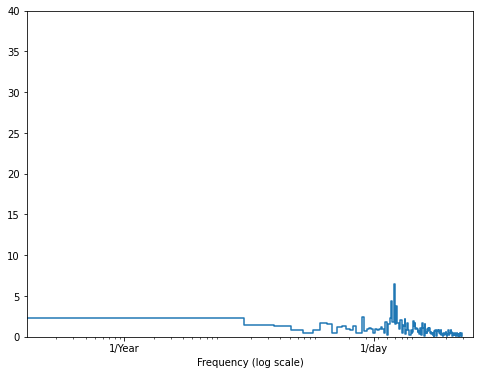

In [1315]:
feature_fft = 'NDVI'
fft = tf.signal.rfft(df[feature_fft].dropna())
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df[feature_fft])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [5]:
from numpy.lib.stride_tricks import sliding_window_view
def sw_res_feats(df,res = 'NDVI', features=['ppt','tmean'],p_res=1,p_feats=(2,2)):
    res_values = df[res].values
    features_values = [df[f].values for f in features]
    v = []
    for index,res in enumerate(res_values):
            if ~np.isnan(res):
                ll = [l[index-p+1:index+1] for l,p in zip(features_values,p_feats)]
                v.append((index,res,ll))

    res = [i[1]for i in v]
    res_sw = sliding_window_view([i[1]for i in v],p_res)[:-1]
    features_sw = [np.array([v[i][2][j] for i in range(p_res,len(v))]) for j in range(len(features))]
    X = np.hstack([res_sw,*features_sw])
    y = np.array(res)[p_res:]
    assert len(X) == len(y)
    return X,y


# X,y = features_sw(df=df,features=features,res=response,p_feats=p_feats,p_res=p_res)
# X,y = sw_res_feats(df=df)

In [6]:
df.columns

Index(['Timestamp', 'ppt', 'tmean', 'DOY', 'Month', 'GDD', 'NDVI'], dtype='object')

In [2614]:
df_monthly = df.resample('M').mean()

/var/folders/sz/44hp86gj0lq16_fywprf9r580000gn/T/ipykernel_42533/259931666.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()


In [354]:
feature_list = ['tmean', 'ppt']

p_res = 1
p_feats = (2,1)
input_dimension = sum(p_feats) + p_res

X,y = sw_res_feats(df=df,features=feature_list,p_res=p_res,p_feats=p_feats)



In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1, random_state=42)


In [356]:
y_train_reshaped = y_train.reshape(len(y_train),1)
X_train_reshaped = X_train.reshape(len(X_train),1,input_dimension)
X_val_reshaped = X_val.reshape(len(X_val),1,input_dimension)
y_val_reshaped = y_val.reshape(len(y_val),1)
X_test_reshaped = X_test.reshape(len(X_test),1,input_dimension)
y_test_reshaped = y_test.reshape(len(y_test),1)

In [357]:
X_train_reshaped.shape

(774, 1, 4)

In [358]:
y_test_reshaped.shape

(96, 1)

In [359]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(120, return_sequences=True,input_shape=(1,input_dimension)),
    # Shape => [batch, time, features]
    tf.keras.layers.LSTM(32,return_sequences=True), 
    tf.keras.layers.LSTM(32), 
    tf.keras.layers.Dense(1)
])

In [360]:
lstm_model.compile(loss = 'mean_squared_error', metrics=['mean_squared_error'],optimizer='adam')

In [361]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)

In [362]:
history=lstm_model.fit(X_train_reshaped, y_train_reshaped, epochs=5000, validation_data=(X_val_reshaped,y_val_reshaped),batch_size=None,verbose=0,callbacks=[early_stopping_cb])

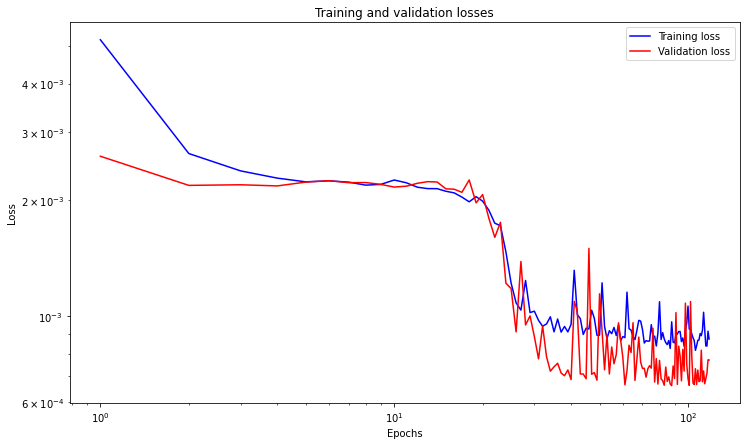

In [363]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.figure(figsize=(12,7))
plt.plot(epochs, train_loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [364]:
from sklearn.metrics import mean_squared_error, r2_score
model_prediction = lstm_model.predict(X_test_reshaped,verbose=0)
test_loss = mean_squared_error(y_test_reshaped,model_prediction.reshape(len(model_prediction),1))
r2 = r2_score(y_test_reshaped,model_prediction.reshape(len(model_prediction),1))
print(f"train loss : {train_loss[-1]:.{5}f}.")
print(f"validation loss : {val_loss[-1]:.{5}f}.")
print(f"test loss : {test_loss:.{5}f}.")
print(f"r2 : {r2:.{5}f}.") 

train loss : 0.00087.
validation loss : 0.00077.
test loss : 0.00050.
r2 : 0.87334.


In [98]:
# df = df.set_index('Timestamp')

In [128]:
df_test = df[['NDVI']].reset_index().dropna().iloc[-len(y_test):]

In [129]:
timestamps_test = df_test.reset_index()['Timestamp']
time_start_test = timestamps_test.iloc[0]
df_test_with_all_values = df[time_start_test:]

In [130]:
y_test_df= pd.DataFrame(y_test,columns=['y_test'])
# long_term_preds_df = pd.DataFrame(long_term_forecast,columns=['preds_all_time'])
model_prediction_df = pd.DataFrame(model_prediction.reshape(len(model_prediction),1),columns=['preds'])

In [131]:
# long_term_preds_df['Timestamp'] = timestamps_test
y_test_df['Timestamp'] = timestamps_test
model_prediction_df['Timestamp'] = timestamps_test

In [132]:
df_test_with_all_values = df_test_with_all_values.reset_index()

In [133]:
df_test_with_all_values.loc[:,'ppt_scaled'] = .008 * df_test_with_all_values['ppt'] 
df_test_with_all_values.loc[:,'tmean_scaled'] = .01 * df_test_with_all_values['tmean']
# df_test_with_all_values.loc[:,'past_56_sum_ppt_scalded'] = .003 * df_test_with_all_values['past_56_sum_ppt']

In [134]:

df_all_NDVI = alt.Chart(df_test_with_all_values.reset_index()).mark_point(color='black',opacity=1, size=5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("NDVI:Q")
)


df_all_pastppt = alt.Chart(df_test_with_all_values.reset_index()).mark_line(color='blue',opacity=1, size=1).encode(
    alt.X("Timestamp:T"), 
    alt.Y("past_56_sum_ppt_scalded:Q")
)


df_all_ppt = alt.Chart(df_test_with_all_values.reset_index()).mark_bar(color='blue',opacity=1, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("ppt_scaled:Q")
)



df_all_tmean = alt.Chart(df_test_with_all_values.reset_index()).mark_bar(color='red',opacity=.5, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("tmean_scaled:Q")
)


#predictions 
y_test_df_plot = alt.Chart(y_test_df.reset_index()).mark_line(color='black',opacity=1, size=1,point={
      "filled": True,
      "fill": "black",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("y_test:Q"),
    tooltip=[
        alt.Tooltip('y_test:O', title='NDVI')]
)
model_prediction_plot = alt.Chart(model_prediction_df.reset_index()).mark_line(color='blue',opacity=1,size=2,point={
      "filled": True,
      "fill": "lime",
    "size" : 50
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("preds:Q"),
    tooltip=[
        alt.Tooltip('preds:O', title='NDVI_prediction')]
)

# preds_all_time_df_plot = alt.Chart(long_term_preds_df.reset_index()).mark_line(color='red',opacity=1, size=1,point={
#       "filled": True,
#       "fill": "red",
#     "size" : 50,
#     'opacity' : .5
#     }).encode(
#     alt.X("Timestamp:T"), 
#     alt.Y("preds_all_time:Q"),
#     tooltip=[
#         alt.Tooltip('preds_all_time:O', title='NDVI')]
# )

(df_all_NDVI+ df_all_ppt+ df_all_tmean + y_test_df_plot + model_prediction_plot).properties(width=1500, height=600)

/Users/vahid/opt/anaconda3/envs/pygee/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/vahid/opt/anaconda3/envs/pygee/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/vahid/opt/anaconda3/envs/pygee/lib/python3.11/site-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dt

alt.LayerChart(...)

# Tensorflow windowing

In [1479]:
df0 = df[['NDVI','ppt','tmean']].dropna()

In [1585]:
df0 = df[['NDVI','ppt','tmean']].fillna(0)

In [1586]:
n = len(df0)
train_df = df0[0:int(n*0.7)]
val_df = df0[int(n*0.7):int(n*0.9)]
test_df = df0[int(n*0.9):]

num_features = df0.shape[1]

In [1481]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [1482]:
WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['NDVI'])

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['NDVI']

In [1483]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [1484]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['NDVI'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['NDVI']

In [1485]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 3)
Inputs shape: (3, 6, 3)
Labels shape: (3, 1, 1)


In [1546]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:wide_window.total_window_size]),
                           np.array(train_df[100:100+wide_window.total_window_size]),
                           np.array(train_df[200:200+wide_window.total_window_size])])
wide_window.split_window(example_window)

(<tf.Tensor: shape=(3, 24, 3), dtype=float64, numpy=
 array([[[ 5.86328380e-02,  0.00000000e+00, -7.92100032e-01],
         [ 5.67324650e-02,  1.89093332e+00,  6.49406700e+00],
         [ 2.27505214e-01,  1.03116129e+00,  2.34628397e+01],
         [ 1.11222271e-01,  3.72866660e-01,  1.39429008e+01],
         [ 4.90659436e-02,  1.58000000e-01, -8.16687130e+00],
         [ 4.68089422e-02,  1.07142861e-02, -6.23289319e+00],
         [ 6.56759582e-02,  6.66333336e-01,  1.05669671e+01],
         [ 1.02972068e-01,  5.76483873e-01,  1.76042912e+01],
         [ 9.41983879e-02,  1.51945166e+00,  2.44982271e+01],
         [ 9.54434484e-02,  1.27554837e+00,  2.09842591e+01],
         [ 7.51664823e-02,  9.78032276e-01,  8.46819394e+00],
         [ 1.78917236e-01,  1.83864513e+00,  1.38663556e+01],
         [ 1.97452396e-01,  1.16293549e+00,  2.28515816e+01],
         [ 1.65892456e-01,  2.23838707e+00,  2.02986783e+01],
         [ 1.52196400e-01,  2.40870001e+00,  1.33025339e+01],
         [ 1.1405

In [1486]:
example_window.shape

TensorShape([3, 7, 3])

In [1487]:
example_inputs

<tf.Tensor: shape=(3, 6, 3), dtype=float64, numpy=
array([[[ 5.86328380e-02,  0.00000000e+00, -7.92100032e-01],
        [ 5.67324650e-02,  1.89093332e+00,  6.49406700e+00],
        [ 2.27505214e-01,  1.03116129e+00,  2.34628397e+01],
        [ 1.11222271e-01,  3.72866660e-01,  1.39429008e+01],
        [ 4.90659436e-02,  1.58000000e-01, -8.16687130e+00],
        [ 4.68089422e-02,  1.07142861e-02, -6.23289319e+00]],

       [[ 6.48779329e-02,  5.33677429e-01, -5.33203258e+00],
        [ 6.51300739e-02,  1.31678575e-01,  2.59917867e+00],
        [ 7.24258279e-02,  7.15129032e-01,  3.25512924e+00],
        [ 9.00729026e-02,  2.02536665e+00,  6.78230032e+00],
        [ 1.47759853e-01,  2.05132254e+00,  1.29066457e+01],
        [ 1.98417337e-01,  3.03774193e+00,  2.32755172e+01]],

       [[ 1.17469887e-01,  5.92999992e-01,  1.60187341e+01],
        [ 8.50244254e-02,  9.70193555e-01,  8.70861334e+00],
        [ 6.77876760e-02,  2.63451617e-01, -5.18296790e+00],
        [ 6.15544573e-02,  1.1

In [1488]:
example_labels

<tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[0.06567596]],

       [[0.15310133]],

       [[0.21167325]]])>

In [1489]:
w2.example = example_inputs, example_labels

In [1490]:
def plot(self, model=None, plot_col='NDVI', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

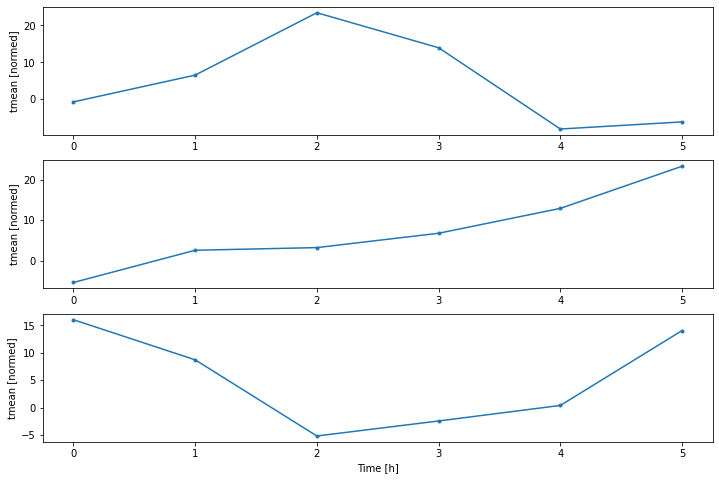

In [1491]:
w2.plot(plot_col='tmean')

In [1492]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [1493]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [1494]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [1495]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [1496]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['NDVI'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['NDVI']

In [1497]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [1498]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [1499]:
column_indices = {name: i for i, name in enumerate(df.columns)}


In [1500]:
column_indices

{'ppt': 0,
 'tmean': 1,
 'tmax': 2,
 'tmin': 3,
 'GDD': 4,
 'NDVI': 5,
 'past_Winter_ppt': 6,
 'past_7_sum_ppt': 7,
 'past_14_sum_ppt': 8,
 'past_21_sum_ppt': 9,
 'past_28_sum_ppt': 10,
 'past_35_sum_ppt': 11,
 'past_42_sum_ppt': 12,
 'past_49_sum_ppt': 13,
 'past_56_sum_ppt': 14,
 'past_63_sum_ppt': 15,
 'past_70_sum_ppt': 16,
 'past_77_sum_ppt': 17,
 'past_84_sum_ppt': 18,
 'past_91_sum_ppt': 19,
 'past_98_sum_ppt': 20,
 'past_105_sum_ppt': 21,
 'past_112_sum_ppt': 22,
 'past_119_sum_ppt': 23,
 'past_126_sum_ppt': 24,
 'past_133_sum_ppt': 25,
 'DOY': 26,
 'past_7_sum_tmean': 27,
 'past_14_sum_tmean': 28,
 'past_21_sum_tmean': 29,
 'past_28_sum_tmean': 30}

In [1501]:
baseline = Baseline(label_index=column_indices['NDVI'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

In [1587]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['NDVI'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['NDVI']

In [1589]:
print('Input shape:', wide_window.example[0].shape)
# print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 3)


In [1647]:
list(wide_window.example[0])

[<tf.Tensor: shape=(24, 3), dtype=float32, numpy=
 array([[ 6.33213967e-02,  6.45357132e-01, -5.97960758e+00],
        [ 6.42884448e-02,  1.12603223e+00,  1.85674202e+00],
        [ 9.70382616e-02,  2.07139993e+00,  8.99840069e+00],
        [ 1.73150510e-01,  1.09593546e+00,  1.33172588e+01],
        [ 1.98538497e-01,  1.77123332e+00,  1.84261341e+01],
        [ 1.26888439e-01,  5.71483850e-01,  2.56537113e+01],
        [ 9.79362875e-02,  4.27677423e-01,  2.52368069e+01],
        [ 7.74910897e-02,  7.67966628e-01,  1.54675007e+01],
        [ 6.97947964e-02,  5.72903216e-01,  1.06847744e+01],
        [ 2.22449116e-02,  7.99032226e-02, -1.63254845e+00],
        [ 5.13208210e-02,  8.47413778e-01, -2.89775872e+00],
        [ 5.94564341e-02,  4.30870950e-01,  4.77800035e+00],
        [ 8.38964954e-02,  2.06433341e-01,  8.88790035e+00],
        [ 8.54839161e-02,  1.51945162e+00,  1.42403879e+01],
        [ 1.33294657e-01,  1.44596660e+00,  1.71278667e+01],
        [ 1.25934631e-01,  1.013967

In [1590]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [1591]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 3)
Output shape: (32, 1, 1)


In [1592]:


def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [1593]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/1000
8/8 [==============================] - 1s 20ms/step - loss: 255.4625 - mean_absolute_error: 13.2844 - val_loss: 243.1182 - val_mean_absolute_error: 12.9739
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 251.3237 - mean_absolute_error: 13.1751 - val_loss: 239.0071 - val_mean_absolute_error: 12.8631
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 247.1583 - mean_absolute_error: 13.0645 - val_loss: 234.9707 - val_mean_absolute_error: 12.7534
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 243.1313 - mean_absolute_error: 12.9561 - val_loss: 230.9646 - val_mean_absolute_error: 12.6435
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 239.0475 - mean_absolute_error: 12.8449 - val_loss: 227.0788 - val_mean_absolute_error: 12.5359
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 235.1005 - mean_absolute_error: 12.7384 - val_loss: 223.2649 - val_mean_absolute_error

In [1597]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 3)
Output shape: (32, 24, 1)


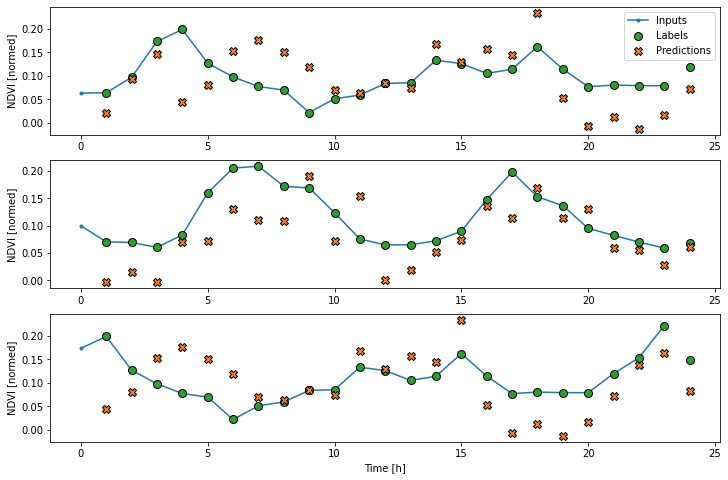

In [1598]:
wide_window.plot(linear)

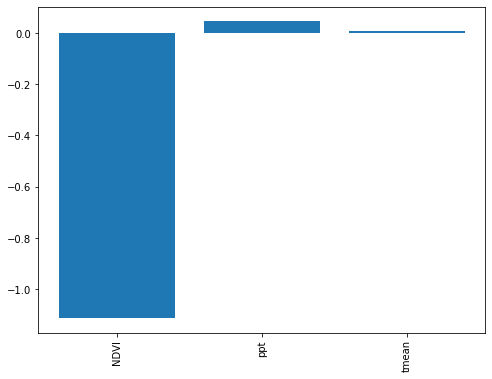

In [1599]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [1631]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(100, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [1632]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 3)
Output shape: (32, 24, 1)


In [1633]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - mean_absolute_error: 0.0253


In [1634]:
performance

{'Linear': [0.004944423213601112, 0.0576285757124424],
 'LSTM': [0.0007533734897151589, 0.02227088436484337]}

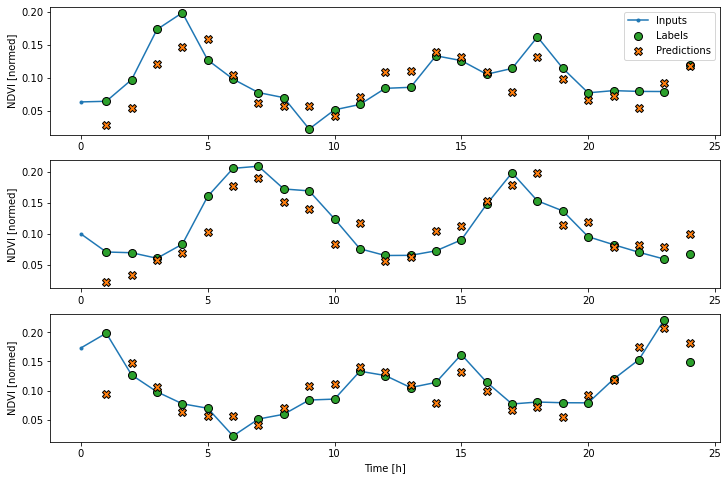

In [1630]:
wide_window.plot(lstm_model)

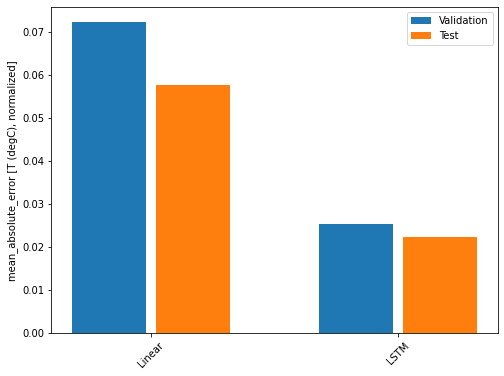

In [1635]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

# My work

In [31]:
def add_season(df):
    def season(month):
        season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'
                    }
        return season.get(month)

    df['season'] = df['Month'].apply(season)
    return df

add_season(ndvi_df_ctwd4)

0            id   longitude   latitude           time      tmean       tmax  \
0      19810101 -101.849415  43.941227   347112000000   1.810000   9.428000   
1      19810102 -101.849415  43.941227   347198400000  -1.893000   3.977000   
2      19810103 -101.849415  43.941227   347284800000  -0.549000   9.504000   
3      19810104 -101.849415  43.941227   347371200000  -3.754000   3.375000   
4      19810105 -101.849415  43.941227   347457600000  -4.703000   0.272000   
...         ...         ...        ...            ...        ...        ...   
15573  20230822 -101.849415  43.941227  1692619200000  25.870800  35.521698   
15574  20230823 -101.849415  43.941227  1692705600000  28.688999  39.758099   
15575  20230824 -101.849415  43.941227  1692792000000  28.432798  38.360298   
15576  20230825 -101.849415  43.941227  1692878400000  26.023699  33.200500   
15577  20230826 -101.849415  43.941227  1692964800000  18.892900  28.011499   

0           tmin  ppt  Timestamp  Year  Month  Day  DOY      NDVI         GD  \
0      -5.808000  0.0 1980-12-31  1980     12   31  366       NaN   0.000000   
1      -7.764000  0.0 1981-01-01  1981      1    1    1       NaN   0.000000   
2     -10.602000  0.0 1981-01-02  1981      1    2    2       NaN   0.000000   
3     -10.883000  0.0 1981-01-03  1981      1    3    3       NaN   0.000000   
4      -9.679000  0.0 1981-01-04  1981      1    4    4       NaN   0.000000   
...          ...  ...        ...   ...    ...  ...  ...       ...        ...   
15573  16.219999  0.0 2023-08-21  2023      8   21  233  0.213638  20.870800   
15574  17.619999  0.0 2023-08-22  2023      8   22  234  0.212440  23.688999   
15575  18.505400  0.0 2023-08-23  2023      8   23  235       NaN  23.432798   
15576  18.847000  0.0 2023-08-24  2023      8   24  236       NaN  21.023699   
15577   9.774400  0.0 2023-08-25  2023      8   25  237       NaN  13.892900   

0              GDD  season  
0         0.000000  Winter  
1         0.000000  Winter  
2         0.000000  Winter  
3         0.000000  Winter  
4         0.000000  Winter  
...            ...     ...  
15573  1798.254833  Summer  
15574  1821.943832  Summer  
15575  1845.376631  Summer  
15576  1866.400330  Summer  
15577  1880.293230  Summer  

[15578 rows x 17 columns]

In [33]:
def add_past_season_sum_feasture(df,feature,season):
    season_feature = df[df['season']== season].groupby('Year')[feature].sum()
    df[f'past_{season}_{feature}'] = df['Year'].map(season_feature)
add_past_season_sum_feasture(ndvi_df_ctwd4,'ppt','Winter')

In [34]:
add_past_sum(ndvi_df_ctwd4,features_list=['ppt'],window=90,min_periods=30)

0            id   longitude   latitude           time      tmean       tmax  \
0      19810101 -101.849415  43.941227   347112000000   1.810000   9.428000   
1      19810102 -101.849415  43.941227   347198400000  -1.893000   3.977000   
2      19810103 -101.849415  43.941227   347284800000  -0.549000   9.504000   
3      19810104 -101.849415  43.941227   347371200000  -3.754000   3.375000   
4      19810105 -101.849415  43.941227   347457600000  -4.703000   0.272000   
...         ...         ...        ...            ...        ...        ...   
15573  20230822 -101.849415  43.941227  1692619200000  25.870800  35.521698   
15574  20230823 -101.849415  43.941227  1692705600000  28.688999  39.758099   
15575  20230824 -101.849415  43.941227  1692792000000  28.432798  38.360298   
15576  20230825 -101.849415  43.941227  1692878400000  26.023699  33.200500   
15577  20230826 -101.849415  43.941227  1692964800000  18.892900  28.011499   

0           tmin  ppt  Timestamp  Year  Month  Day  DOY      NDVI         GD  \
0      -5.808000  0.0 1980-12-31  1980     12   31  366       NaN   0.000000   
1      -7.764000  0.0 1981-01-01  1981      1    1    1       NaN   0.000000   
2     -10.602000  0.0 1981-01-02  1981      1    2    2       NaN   0.000000   
3     -10.883000  0.0 1981-01-03  1981      1    3    3       NaN   0.000000   
4      -9.679000  0.0 1981-01-04  1981      1    4    4       NaN   0.000000   
...          ...  ...        ...   ...    ...  ...  ...       ...        ...   
15573  16.219999  0.0 2023-08-21  2023      8   21  233  0.213638  20.870800   
15574  17.619999  0.0 2023-08-22  2023      8   22  234  0.212440  23.688999   
15575  18.505400  0.0 2023-08-23  2023      8   23  235       NaN  23.432798   
15576  18.847000  0.0 2023-08-24  2023      8   24  236       NaN  21.023699   
15577   9.774400  0.0 2023-08-25  2023      8   25  237       NaN  13.892900   

0              GDD  season  past_Winter_ppt  past_90_sum_ppt  
0         0.000000  Winter         0.000000              NaN  
1         0.000000  Winter         9.938000              NaN  
2         0.000000  Winter         9.938000              NaN  
3         0.000000  Winter         9.938000              NaN  
4         0.000000  Winter         9.938000              NaN  
...            ...     ...              ...              ...  
15573  1798.254833  Summer        38.857999        264.01449  
15574  1821.943832  Summer        38.857999        264.01449  
15575  1845.376631  Summer        38.857999        264.01449  
15576  1866.400330  Summer        38.857999        263.46279  
15577  1880.293230  Summer        38.857999        262.71069  

[15578 rows x 19 columns]

In [1003]:
for n_week in range(1,5):
    add_past_sum(df,features_list=['tmean'],window=n_week * 7,min_periods=7)

In [35]:
for n_week in range(1,20):
    add_past_sum(ndvi_df_ctwd4,features_list=['ppt'],window=n_week * 7,min_periods=7)

In [37]:
ndvi_df_ctwd4

0            id   longitude   latitude           time      tmean       tmax  \
0      19810101 -101.849415  43.941227   347112000000   1.810000   9.428000   
1      19810102 -101.849415  43.941227   347198400000  -1.893000   3.977000   
2      19810103 -101.849415  43.941227   347284800000  -0.549000   9.504000   
3      19810104 -101.849415  43.941227   347371200000  -3.754000   3.375000   
4      19810105 -101.849415  43.941227   347457600000  -4.703000   0.272000   
...         ...         ...        ...            ...        ...        ...   
15573  20230822 -101.849415  43.941227  1692619200000  25.870800  35.521698   
15574  20230823 -101.849415  43.941227  1692705600000  28.688999  39.758099   
15575  20230824 -101.849415  43.941227  1692792000000  28.432798  38.360298   
15576  20230825 -101.849415  43.941227  1692878400000  26.023699  33.200500   
15577  20230826 -101.849415  43.941227  1692964800000  18.892900  28.011499   

0           tmin  ppt  Timestamp  Year  ...  past_70_sum_ppt  past_77_sum_ppt  \
0      -5.808000  0.0 1980-12-31  1980  ...              NaN              NaN   
1      -7.764000  0.0 1981-01-01  1981  ...              NaN              NaN   
2     -10.602000  0.0 1981-01-02  1981  ...              NaN              NaN   
3     -10.883000  0.0 1981-01-03  1981  ...              NaN              NaN   
4      -9.679000  0.0 1981-01-04  1981  ...              NaN              NaN   
...          ...  ...        ...   ...  ...              ...              ...   
15573  16.219999  0.0 2023-08-21  2023  ...       143.559496       259.259690   
15574  17.619999  0.0 2023-08-22  2023  ...       143.559496       259.259690   
15575  18.505400  0.0 2023-08-23  2023  ...       143.559496       259.259690   
15576  18.847000  0.0 2023-08-24  2023  ...       143.559496       259.254690   
15577   9.774400  0.0 2023-08-25  2023  ...       142.005296       203.629294   

0      past_84_sum_ppt  past_91_sum_ppt  past_98_sum_ppt  past_105_sum_ppt  \
0                  NaN              NaN              NaN               NaN   
1                  NaN              NaN              NaN               NaN   
2                  NaN              NaN              NaN               NaN   
3                  NaN              NaN              NaN               NaN   
4                  NaN              NaN              NaN               NaN   
...                ...              ...              ...               ...   
15573        262.71069        264.01449        264.01449        344.418390   
15574        260.45869        264.01449        264.01449        340.809290   
15575        260.45869        264.01449        264.01449        339.797090   
15576        259.27159        264.01449        264.01449        307.335389   
15577        259.27159        263.46279        264.01449        275.543790   

0     past_112_sum_ppt  past_119_sum_ppt  past_126_sum_ppt  past_133_sum_ppt  
0                  NaN               NaN               NaN               NaN  
1                  NaN               NaN               NaN               NaN  
2                  NaN               NaN               NaN               NaN  
3                  NaN               NaN               NaN               NaN  
4                  NaN               NaN               NaN               NaN  
...                ...               ...               ...               ...  
15573        355.00839         356.16279         358.31399         360.18509  
15574        355.00839         356.16279         356.16279         360.18509  
15575        355.00839         356.16279         356.16279         360.18509  
15576        355.00839         355.00839         356.16279         358.56199  
15577        350.69269         355.00839         356.16279         358.31399  

[15578 rows x 38 columns]

In [ ]:
# ndvi_ppt_tempt_pasture_ctwd4.to_csv('./ndvi_ppt_tempt_pasture_ctwd4.csv')

In [ ]:
# ndvi_ppt_tempt_pasture_ctwd4 = pd.read_csv('./ndvi_ppt_tempt_pasture_ctwd4.csv')

In [386]:
df_vis.columns

Index(['Unnamed: 0', 'id', 'longitude', 'latitude', 'time', 'tmean', 'tmax',
       'tmin', 'ppt', 'Timestamp', 'Year', 'Month', 'Day', 'DOY', 'NDVI', 'GD',
       'GDD', 'past_7_sum_ppt', 'past_14_sum_ppt', 'past_21_sum_ppt',
       'past_28_sum_ppt', 'past_35_sum_ppt', 'past_42_sum_ppt',
       'past_49_sum_ppt', 'past_56_sum_ppt', 'past_63_sum_ppt',
       'past_70_sum_ppt', 'past_77_sum_ppt', 'past_84_sum_ppt',
       'past_91_sum_ppt', 'past_98_sum_ppt', 'past_105_sum_ppt',
       'past_112_sum_ppt', 'past_119_sum_ppt', 'past_126_sum_ppt',
       'past_133_sum_ppt'],
      dtype='object')

In [38]:
df_vis = ndvi_df_ctwd4.copy()

In [1005]:
df.columns

Index(['ppt', 'tmean', 'tmax', 'tmin', 'GDD', 'NDVI', 'past_Winter_ppt',
       'past_7_sum_ppt', 'past_14_sum_ppt', 'past_21_sum_ppt',
       'past_28_sum_ppt', 'past_35_sum_ppt', 'past_42_sum_ppt',
       'past_49_sum_ppt', 'past_56_sum_ppt', 'past_63_sum_ppt',
       'past_70_sum_ppt', 'past_77_sum_ppt', 'past_84_sum_ppt',
       'past_91_sum_ppt', 'past_98_sum_ppt', 'past_105_sum_ppt',
       'past_112_sum_ppt', 'past_119_sum_ppt', 'past_126_sum_ppt',
       'past_133_sum_ppt', 'DOY', 'past_7_sum_tmean', 'past_14_sum_tmean',
       'past_21_sum_tmean', 'past_28_sum_tmean'],
      dtype='object', name=0)

In [41]:
# scale for better visualization 
time_period = slice(0000,5000)
df_vis['NDVI_scaled'] = df_vis['NDVI'] * 100
df_vis['past_49_sum_ppt_scaled'] = df_vis['past_49_sum_ppt']/4
df_vis['GDD_scaled'] = df_vis['GDD']/100
tmean = alt.Chart(df_vis.iloc[time_period]).mark_bar(color='red',size=.2).encode(
alt.X("Timestamp:T"), alt.Y("tmean:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('tmean:Q', title='tmean')]
)

past_ppt = alt.Chart(df_vis.iloc[time_period]).mark_line(color='blue',size=.6).encode(
alt.X("Timestamp:T"), alt.Y("past_49_sum_ppt_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('past90_sum_ppt:Q', title='past_precipitation')]
)

precip = alt.Chart(df_vis.iloc[time_period]).mark_bar(color='blue',size=1).encode(
    alt.X("Timestamp:T"), alt.Y("ppt:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('ppt:Q', title='ppt')]
)

ndvi = alt.Chart(df_vis.iloc[time_period]).mark_point(color='black',size=5).encode(
    alt.X("Timestamp:T"), alt.Y("NDVI_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('NDVI:Q', title='NDVI')]
)

GDD = alt.Chart(df_vis.iloc[time_period]).mark_point(size=1).encode(
alt.X("Timestamp:T"), alt.Y("GDD_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('GDD:Q', title='GDD')]
)



(tmean + precip + ndvi + GDD+past_ppt).properties(width=2000, height=500)

alt.LayerChart(...)

In [37]:
df_vis.drop(df_vis[df_vis['NDVI']<= - 0.001].index,inplace=True)

In [281]:
ndvi_ppt_tempt_pasture_ctwd4.drop(ndvi_ppt_tempt_pasture_ctwd4[ndvi_ppt_tempt_pasture_ctwd4['NDVI']<= - 0.001].index,inplace=True)

In [43]:
ndvi_df_ctwd4.columns

Index(['id', 'longitude', 'latitude', 'time', 'tmean', 'tmax', 'tmin', 'ppt',
       'Timestamp', 'Year', 'Month', 'Day', 'DOY', 'NDVI', 'GD', 'GDD',
       'season', 'past_Winter_ppt', 'past_90_sum_ppt', 'past_7_sum_ppt',
       'past_14_sum_ppt', 'past_21_sum_ppt', 'past_28_sum_ppt',
       'past_35_sum_ppt', 'past_42_sum_ppt', 'past_49_sum_ppt',
       'past_56_sum_ppt', 'past_63_sum_ppt', 'past_70_sum_ppt',
       'past_77_sum_ppt', 'past_84_sum_ppt', 'past_91_sum_ppt',
       'past_98_sum_ppt', 'past_105_sum_ppt', 'past_112_sum_ppt',
       'past_119_sum_ppt', 'past_126_sum_ppt', 'past_133_sum_ppt'],
      dtype='object', name=0)

In [46]:
df0 = ndvi_df_ctwd4.sort_values('Timestamp').set_index('Timestamp')[['ppt','tmean','tmax','tmin','GDD','NDVI','past_Winter_ppt', 'past_7_sum_ppt',
       'past_14_sum_ppt', 'past_21_sum_ppt', 'past_28_sum_ppt',
       'past_35_sum_ppt', 'past_42_sum_ppt', 'past_49_sum_ppt',
       'past_56_sum_ppt', 'past_63_sum_ppt', 'past_70_sum_ppt',
       'past_77_sum_ppt', 'past_84_sum_ppt', 'past_91_sum_ppt',
       'past_98_sum_ppt', 'past_105_sum_ppt', 'past_112_sum_ppt',
       'past_119_sum_ppt', 'past_126_sum_ppt', 'past_133_sum_ppt','DOY']]

In [47]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15578 entries, 1980-12-31 to 2023-08-25
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ppt               15578 non-null  float64
 1   tmean             15578 non-null  float64
 2   tmax              15578 non-null  float64
 3   tmin              15578 non-null  float64
 4   GDD               15578 non-null  float64
 5   NDVI              795 non-null    float64
 6   past_Winter_ppt   15578 non-null  float64
 7   past_7_sum_ppt    15572 non-null  float64
 8   past_14_sum_ppt   15572 non-null  float64
 9   past_21_sum_ppt   15572 non-null  float64
 10  past_28_sum_ppt   15572 non-null  float64
 11  past_35_sum_ppt   15572 non-null  float64
 12  past_42_sum_ppt   15572 non-null  float64
 13  past_49_sum_ppt   15572 non-null  float64
 14  past_56_sum_ppt   15572 non-null  float64
 15  past_63_sum_ppt   15572 non-null  float64
 16  past_70_sum_ppt   15572

In [1193]:
df_monthly_mean = df.resample('M').mean()

In [48]:
from src.ARX_model import arx_model

2023-08-29 12:44:10.735446: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
from keras.models import Sequential
from keras.layers import Dense 

In [50]:
from keras.callbacks import EarlyStopping

In [1281]:
# inputs 
# df = df0
df = df_monthly_mean
features_list = ['ppt','GDD','tmean','DOY','past_119_sum_ppt','past_7_sum_tmean', 'past_14_sum_tmean',
       'past_21_sum_tmean', 'past_28_sum_tmean']
p_feats=(0, 1, 4, 0, 1, 0, 0,0,0)
p_res=0
input_dimension = sum(p_feats) + p_res

In [1318]:
deep_model = Sequential()
deep_model.add(Dense(200, activation='sigmoid',use_bias=True,input_dim=input_dimension))
# model.add(Dense(100,activation='sigmoid'))
# model.add(Dense(100,activation='sigmoid'))
# model.add(Dense(50,activation='sigmoid'))
# deep_model.add(Dense(10, activation='sigmoid'))
deep_model.add(Dense(20,activation='sigmoid'))
deep_model.add(Dense(1,activation='sigmoid'))
# deep_model.summary()

In [1319]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')

In [1320]:
model, history, X_test, y_test,model_prediction, preds_ndvi_all, long_term_forecast,r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1000,features=features_list,early_stopping=early_stop,test_size=.1,fill_missing=False,test_time=None)

train loss : 0.00062.
validation loss : 0.00071.
test loss : 0.00042.
r2 : 0.85063.


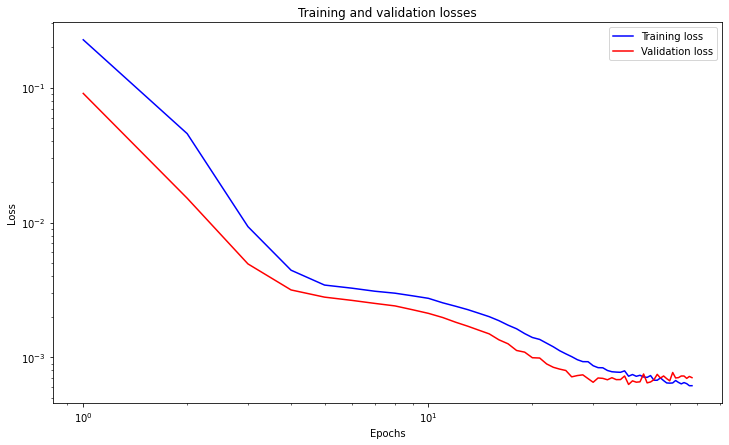

In [1321]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.figure(figsize=(12,7))
plt.plot(epochs, train_loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [1322]:
df_test = df[['NDVI']].reset_index().dropna().iloc[-len(y_test):]

In [1323]:
timestamps_test = df_test.reset_index()['Timestamp']

In [1324]:
time_start_test = timestamps_test.iloc[0]

In [1325]:
df_test_with_all_values = df[time_start_test:]

In [1326]:
y_test_df= pd.DataFrame(y_test,columns=['y_test'])
long_term_preds_df = pd.DataFrame(long_term_forecast,columns=['preds_all_time'])
model_prediction_df = pd.DataFrame(model_prediction,columns=['preds'])

In [1327]:
long_term_preds_df['Timestamp'] = timestamps_test
y_test_df['Timestamp'] = timestamps_test
model_prediction_df['Timestamp'] = timestamps_test

In [1328]:
df_test_with_all_values = df_test_with_all_values.reset_index()

In [1329]:
df_test_with_all_values.loc[:,'ppt_scaled'] = .008 * df_test_with_all_values['ppt'] 
df_test_with_all_values.loc[:,'tmean_scaled'] = .01 * df_test_with_all_values['tmean']
df_test_with_all_values.loc[:,'past_56_sum_ppt_scalded'] = .003 * df_test_with_all_values['past_56_sum_ppt']

In [1330]:

df_all_NDVI = alt.Chart(df_test_with_all_values.reset_index()).mark_point(color='black',opacity=1, size=5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("NDVI:Q")
)


df_all_pastppt = alt.Chart(df_test_with_all_values.reset_index()).mark_line(color='blue',opacity=1, size=1).encode(
    alt.X("Timestamp:T"), 
    alt.Y("past_56_sum_ppt_scalded:Q")
)


df_all_ppt = alt.Chart(df_test_with_all_values.reset_index()).mark_bar(color='blue',opacity=1, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("ppt_scaled:Q")
)



df_all_tmean = alt.Chart(df_test_with_all_values.reset_index()).mark_bar(color='red',opacity=.5, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("tmean_scaled:Q")
)


#predictions 
y_test_df_plot = alt.Chart(y_test_df.reset_index()).mark_line(color='black',opacity=1, size=1,point={
      "filled": True,
      "fill": "black",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("y_test:Q"),
    tooltip=[
        alt.Tooltip('y_test:O', title='NDVI')]
)
model_prediction_plot = alt.Chart(model_prediction_df.reset_index()).mark_line(color='blue',opacity=1,size=2,point={
      "filled": True,
      "fill": "lime",
    "size" : 50
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("preds:Q"),
    tooltip=[
        alt.Tooltip('preds:O', title='NDVI_prediction')]
)

preds_all_time_df_plot = alt.Chart(long_term_preds_df.reset_index()).mark_line(color='red',opacity=1, size=1,point={
      "filled": True,
      "fill": "red",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("preds_all_time:Q"),
    tooltip=[
        alt.Tooltip('preds_all_time:O', title='NDVI')]
)

(df_all_NDVI+ df_all_ppt+ df_all_tmean+ preds_all_time_df_plot + y_test_df_plot + model_prediction_plot).properties(width=1500, height=600)

alt.LayerChart(...)

In [93]:
r2_tlosss_linear_model = []
r2_tlosss_deep_model = []
i = 0
df = df0
# past_select_windows_ppt = ['past_7_sum_ppt',  'past_56_sum_ppt','past_98_sum_ppt']
features_list = ['ppt','GDD','tmean','DOY', 'past_56_sum_ppt']

doyw = 1
input_dimension = sum(p_feats) + p_res
for pw in range(2):
    for tw in range(1,3):
        for nw in range(1):
            for gddw in range(2):
                for past_ppt7 in range(2):
                    for past_ppt56 in range(2):
                        for past_ppt98 in range(2):
                
            

                            i += 1
                            p_feats=(pw,gddw,tw,doyw,past_ppt7,past_ppt56,past_ppt98)
                            p_res=nw
                            input_dimension = sum(p_feats) + p_res

                            # linear_model = Sequential()
                            # linear_model.add(Dense(1, activation='linear',input_dim= input_dimension))

                            # # model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,linear_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=['ppt','GDD','tmean'])

                            # r2_tlosss_linear_model.append([p_feats, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])

                            deep_model = Sequential()
                            deep_model.add(Dense(200, activation='sigmoid',input_dim=input_dimension))
                            deep_model.add(Dense(30,activation='sigmoid'))
                            deep_model.add(Dense(1,activation='sigmoid'))

                            # print(f"temperature past window = {j}.")
                            # print(f"predipitation past window = {i}.")
                            # print(f"ndvi past window = {k}.")
                            model, history, X_test, y_test,model_prediction, preds_ndvi_all, long_term_forecast,r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1000,features=features_list,early_stopping=EarlyStopping(patience=10),fill_missing=False,test_time=None)
                            # model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=features_list)
                            r2_tlosss_deep_model.append([p_feats, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])

                            print(f"{i}")

train loss : 0.00199.
validation loss : 0.00139.
test loss : 0.00172.
r2 : 0.49965.
1
train loss : 0.00078.
validation loss : 0.00090.
test loss : 0.00087.
r2 : 0.74550.
2
train loss : 0.00088.
validation loss : 0.00090.
test loss : 0.00074.
r2 : 0.78464.
3
train loss : 0.00085.
validation loss : 0.00096.
test loss : 0.00074.
r2 : 0.78309.
4
train loss : 0.00185.
validation loss : 0.00122.
test loss : 0.00152.
r2 : 0.55636.
5
train loss : 0.00078.
validation loss : 0.00089.
test loss : 0.00087.
r2 : 0.74498.
6
train loss : 0.00082.
validation loss : 0.00074.
test loss : 0.00078.
r2 : 0.77178.
7
train loss : 0.00064.
validation loss : 0.00080.
test loss : 0.00075.
r2 : 0.78039.
8
train loss : 0.00168.
validation loss : 0.00134.
test loss : 0.00099.
r2 : 0.71106.
9
train loss : 0.00059.
validation loss : 0.00065.
test loss : 0.00059.
r2 : 0.82764.
10
train loss : 0.00090.
validation loss : 0.00101.
test loss : 0.00082.
r2 : 0.76049.
11
train loss : 0.00054.
validation loss : 0.00073.
tes

In [95]:
scores_deep_model = [(i[0:3],i[3][-1],i[4:7]) for i in r2_tlosss_deep_model]

In [96]:
p_list =[scores_deep_model[i][0][0] for i in range(len(scores_deep_model))]
p_res_list = [scores_deep_model[i][0][1] for i in range(len(scores_deep_model))]
r2_list = [scores_deep_model[i][0][2] for i in range(len(scores_deep_model))]
train_loss_list = [scores_deep_model[i][1] for i in range(len(scores_deep_model))]
test_loss_list = [scores_deep_model[i][2][0] for i in range(len(scores_deep_model))]
long_term_loss_list = [scores_deep_model[i][2][1] for i in range(len(scores_deep_model))]
long_term_r2_list = [scores_deep_model[i][2][2] for i in range(len(scores_deep_model))]

scores_df_deep = pd.DataFrame({'p_feats':p_list, 'p_res':p_res_list,
                     'r2':r2_list,'MSE_test':test_loss_list, 'MSE_train': train_loss_list, 'long_term_MSE':long_term_loss_list, 'long_term_r2':long_term_r2_list })

In [97]:
features_list = ['ppt','GDD','tmean','DOY','past_7_sum_ppt',  'past_56_sum_ppt','past_98_sum_ppt']
scores_df_deep.sort_values(by='MSE_test',ascending=True)

p_feats  p_res        r2  MSE_test  MSE_train long_term_MSE  \
63  (1, 1, 2, 1, 1, 1, 1)      0  0.849656  0.000516   0.000492          None   
15  (0, 1, 1, 1, 1, 1, 1)      0  0.848254  0.000520   0.000514          None   
11  (0, 1, 1, 1, 0, 1, 1)      0  0.842205  0.000541   0.000540          None   
47  (1, 1, 1, 1, 1, 1, 1)      0  0.838989  0.000552   0.000531          None   
57  (1, 1, 2, 1, 0, 0, 1)      0  0.837400  0.000558   0.000585          None   
..                    ...    ...       ...       ...        ...           ...   
36  (1, 0, 1, 1, 1, 0, 0)      0  0.553350  0.001532   0.001839          None   
48  (1, 0, 2, 1, 0, 0, 0)      0  0.535461  0.001593   0.001802          None   
16  (0, 0, 2, 1, 0, 0, 0)      0  0.509863  0.001681   0.001957          None   
32  (1, 0, 1, 1, 0, 0, 0)      0  0.509711  0.001681   0.002140          None   
0   (0, 0, 1, 1, 0, 0, 0)      0  0.499646  0.001716   0.001989          None   

   long_term_r2  
63         None  
15         None  
11         None  
47         None  
57         None  
..          ...  
36         None  
48         None  
16         None  
32         None  
0          None  

[64 rows x 7 columns]

In [306]:
past_ppt_windows

['past_7_sum_ppt',
 'past_14_sum_ppt',
 'past_21_sum_ppt',
 'past_28_sum_ppt',
 'past_35_sum_ppt',
 'past_42_sum_ppt',
 'past_49_sum_ppt',
 'past_56_sum_ppt',
 'past_63_sum_ppt',
 'past_70_sum_ppt',
 'past_77_sum_ppt',
 'past_84_sum_ppt',
 'past_91_sum_ppt',
 'past_98_sum_ppt',
 'past_105_sum_ppt',
 'past_112_sum_ppt',
 'past_119_sum_ppt',
 'past_126_sum_ppt',
 'past_133_sum_ppt']

In [91]:
past_ppt_windows = ['past_7_sum_ppt', 'past_14_sum_ppt', 'past_21_sum_ppt',
       'past_28_sum_ppt', 'past_35_sum_ppt', 'past_42_sum_ppt',
       'past_49_sum_ppt', 'past_56_sum_ppt', 'past_63_sum_ppt',
       'past_70_sum_ppt', 'past_77_sum_ppt', 'past_84_sum_ppt',
       'past_91_sum_ppt', 'past_98_sum_ppt', 'past_105_sum_ppt',
       'past_112_sum_ppt', 'past_119_sum_ppt', 'past_126_sum_ppt',
       'past_133_sum_ppt']

past_select_windows_ppt = ['past_7_sum_ppt',  'past_56_sum_ppt','past_98_sum_ppt']

In [240]:
r2_tlosss_deep_model = []
i = 0
df = df0


for window in past_ppt_windows:
    features_list = ['ppt','GDD','tmean','DOY',window]
    p_feats = (0,1,4,0,1)
    p_res = 0
    input_dimension = sum(p_feats) + p_res

    i += 1

    # linear_model = Sequential()
    # linear_model.add(Dense(1, activation='linear',input_dim= input_dimension))

    # # model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,linear_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=['ppt','GDD','tmean'])

    # r2_tlosss_linear_model.append([p_feats, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])

    deep_model = Sequential()
    deep_model.add(Dense(200, activation='sigmoid',input_dim=input_dimension))
    deep_model.add(Dense(30,activation='sigmoid'))
    deep_model.add(Dense(1,activation='sigmoid'))

    # print(f"temperature past window = {j}.")
    # print(f"predipitation past window = {i}.")
    # print(f"ndvi past window = {k}.")
    model, history, X_test, y_test,model_prediction, preds_ndvi_all, long_term_forecast,r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1000,features=features_list,early_stopping=EarlyStopping(patience=10),fill_missing=False,test_time=None)
    # model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=features_list)
    r2_tlosss_deep_model.append([window, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])

    print(i)

train loss : 0.00138.
validation loss : 0.00118.
test loss : 0.00115.
r2 : 0.66339.
1
train loss : 0.00128.
validation loss : 0.00117.
test loss : 0.00086.
r2 : 0.74979.
2
train loss : 0.00121.
validation loss : 0.00125.
test loss : 0.00061.
r2 : 0.82292.
3
train loss : 0.00107.
validation loss : 0.00091.
test loss : 0.00058.
r2 : 0.83220.
4
train loss : 0.00106.
validation loss : 0.00101.
test loss : 0.00064.
r2 : 0.81265.
5
train loss : 0.00092.
validation loss : 0.00086.
test loss : 0.00084.
r2 : 0.75452.
6
train loss : 0.00078.
validation loss : 0.00072.
test loss : 0.00068.
r2 : 0.80201.
7
train loss : 0.00087.
validation loss : 0.00074.
test loss : 0.00067.
r2 : 0.80509.
8
train loss : 0.00077.
validation loss : 0.00081.
test loss : 0.00068.
r2 : 0.80259.
9
train loss : 0.00069.
validation loss : 0.00056.
test loss : 0.00062.
r2 : 0.81907.
10
train loss : 0.00072.
validation loss : 0.00060.
test loss : 0.00054.
r2 : 0.84256.
11
train loss : 0.00068.
validation loss : 0.00063.
tes

In [241]:
scores_deep_model = [(i[0:3],i[3][-1],i[4:7]) for i in r2_tlosss_deep_model]

In [242]:
p_list =[scores_deep_model[i][0][0] for i in range(len(scores_deep_model))]
p_res_list = [scores_deep_model[i][0][1] for i in range(len(scores_deep_model))]
r2_list = [scores_deep_model[i][0][2] for i in range(len(scores_deep_model))]
train_loss_list = [scores_deep_model[i][1] for i in range(len(scores_deep_model))]
test_loss_list = [scores_deep_model[i][2][0] for i in range(len(scores_deep_model))]
long_term_loss_list = [scores_deep_model[i][2][1] for i in range(len(scores_deep_model))]
long_term_r2_list = [scores_deep_model[i][2][2] for i in range(len(scores_deep_model))]

scores_df_deep = pd.DataFrame({'p_feats':p_list, 'p_res':p_res_list,
                     'r2':r2_list,'MSE_test':test_loss_list, 'MSE_train': train_loss_list, 'long_term_MSE':long_term_loss_list, 'long_term_r2':long_term_r2_list })

In [247]:
compare_df = scores_df_deep.sort_values(by='r2',ascending=False)

In [248]:
compare_df

p_feats  p_res        r2  MSE_test  MSE_train long_term_MSE  \
16  past_119_sum_ppt      0  0.860748  0.000478   0.000757          None   
18  past_133_sum_ppt      0  0.849242  0.000517   0.000591          None   
17  past_126_sum_ppt      0  0.844653  0.000533   0.000610          None   
15  past_112_sum_ppt      0  0.843280  0.000537   0.000646          None   
10   past_77_sum_ppt      0  0.842565  0.000540   0.000719          None   
3    past_28_sum_ppt      0  0.832200  0.000575   0.001068          None   
14  past_105_sum_ppt      0  0.830206  0.000582   0.000704          None   
12   past_91_sum_ppt      0  0.829673  0.000584   0.000722          None   
2    past_21_sum_ppt      0  0.822915  0.000607   0.001209          None   
9    past_70_sum_ppt      0  0.819075  0.000620   0.000688          None   
4    past_35_sum_ppt      0  0.812649  0.000642   0.001055          None   
11   past_84_sum_ppt      0  0.810891  0.000648   0.000684          None   
7    past_56_sum_ppt      0  0.805086  0.000668   0.000870          None   
8    past_63_sum_ppt      0  0.802590  0.000677   0.000768          None   
6    past_49_sum_ppt      0  0.802015  0.000679   0.000776          None   
13   past_98_sum_ppt      0  0.789532  0.000722   0.000704          None   
5    past_42_sum_ppt      0  0.754524  0.000842   0.000918          None   
1    past_14_sum_ppt      0  0.749785  0.000858   0.001279          None   
0     past_7_sum_ppt      0  0.663388  0.001154   0.001384          None   

   long_term_r2  
16         None  
18         None  
17         None  
15         None  
10         None  
3          None  
14         None  
12         None  
2          None  
9          None  
4          None  
11         None  
7          None  
8          None  
6          None  
13         None  
5          None  
1          None  
0          None

In [244]:
scores_df_deep.reset_index()

index           p_feats  p_res        r2  MSE_test  MSE_train  \
0       0    past_7_sum_ppt      0  0.663388  0.001154   0.001384   
1       1   past_14_sum_ppt      0  0.749785  0.000858   0.001279   
2       2   past_21_sum_ppt      0  0.822915  0.000607   0.001209   
3       3   past_28_sum_ppt      0  0.832200  0.000575   0.001068   
4       4   past_35_sum_ppt      0  0.812649  0.000642   0.001055   
5       5   past_42_sum_ppt      0  0.754524  0.000842   0.000918   
6       6   past_49_sum_ppt      0  0.802015  0.000679   0.000776   
7       7   past_56_sum_ppt      0  0.805086  0.000668   0.000870   
8       8   past_63_sum_ppt      0  0.802590  0.000677   0.000768   
9       9   past_70_sum_ppt      0  0.819075  0.000620   0.000688   
10     10   past_77_sum_ppt      0  0.842565  0.000540   0.000719   
11     11   past_84_sum_ppt      0  0.810891  0.000648   0.000684   
12     12   past_91_sum_ppt      0  0.829673  0.000584   0.000722   
13     13   past_98_sum_ppt      0  0.789532  0.000722   0.000704   
14     14  past_105_sum_ppt      0  0.830206  0.000582   0.000704   
15     15  past_112_sum_ppt      0  0.843280  0.000537   0.000646   
16     16  past_119_sum_ppt      0  0.860748  0.000478   0.000757   
17     17  past_126_sum_ppt      0  0.844653  0.000533   0.000610   
18     18  past_133_sum_ppt      0  0.849242  0.000517   0.000591   

   long_term_MSE long_term_r2  
0           None         None  
1           None         None  
2           None         None  
3           None         None  
4           None         None  
5           None         None  
6           None         None  
7           None         None  
8           None         None  
9           None         None  
10          None         None  
11          None         None  
12          None         None  
13          None         None  
14          None         None  
15          None         None  
16          None         None  
17          None         None  
18          None         None

In [245]:
alt.Chart(scores_df_deep.reset_index()).mark_bar(size=6).encode(
alt.X("p_feats:O",sort=alt.EncodingSortField(field="index", op="count", order='ascending')), alt.Y("r2:Q") ).properties(width=500, height=300)

alt.Chart(...)